In [29]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [5]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
x = iris.data
y = iris.target

iris_df = pd.DataFrame(x, columns = iris.feature_names)

In [16]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

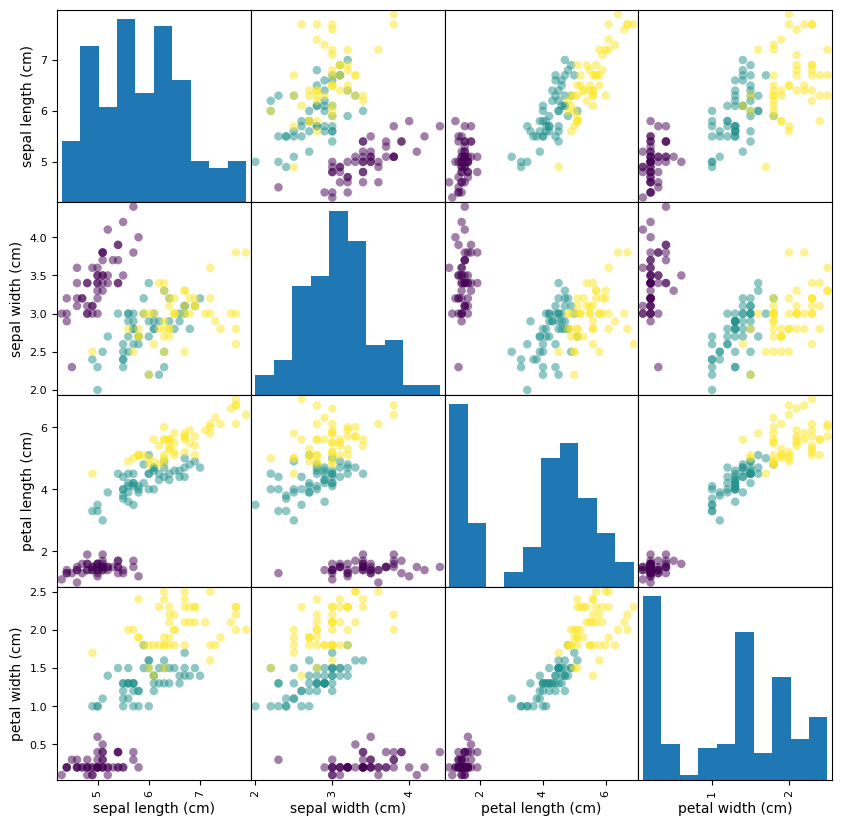

In [27]:
pd.plotting.scatter_matrix(iris_df, figsize=[10,10], c=y, s=150) #visualizing behavior of data

In [28]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris.data, iris.target)

KNeighborsClassifier(n_neighbors=6)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 28)

In [31]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [38]:
#Predicting values using the model
y_predict = knn.predict(x_test)
y_predict_probs = knn.predict_proba(x_test)

print(y_predict) #Prediction
print(y_predict_probs) #Probability for each prediction

[0 2 1 0 2 1 2 1 1 0 2 0 1 1 2 0 2 2 2 1 0 0 1 2 1 0 2 2 0 1 0 2 1 0 2 1 2
 1 1 2 1 1 2 1 0]
[[1.         0.         0.        ]
 [0.         0.16666667 0.83333333]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         0.16666667 0.83333333]
 [1.         0.         0.        ]
 [0.         0.83333333 0.16666667]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.33333333 0.66666667]
 [0.         1.         0.        ]
 [1.   

In [40]:
knn.score(x_test,y_test) #Accuracy

0.9555555555555556

In [44]:
#Playing with various n_neighbors value
param_value = []
model_score = []
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    param_value.append(n)
    knn.fit(x_train, y_train)
    model_score.append(knn.score(x_test,y_test))

print("Highest score: " + str(max(model_score)))
print("n_neighbor value: " + str(param_value[model_score.index(max(model_score))]))

Highest score: 0.9777777777777777
n_neighbor value: 3
